In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
dfs = []
for i in range(51):
    df = pd.read_csv(f"../data/human_scores_cleaned/human_scores_batch{i}.csv.gz")
    dfs.append(df)

df_with_na = pd.concat(dfs).drop("Unnamed: 0", axis=1)
df_with_na = df_with_na.drop("Unnamed: 0.1", axis=1)
df = df_with_na[df_with_na.position_score.notna()]
df_with_na.head()

,elo,color,clock,bullet,rapid,classic,blitz,rated,past_move_str,current_move_str,position_score,norm_score,pre_move_score,player_move,player_score,legal_move_scores
0,0.399333,0,0.254335,0,1,0,0,1,r5kr/pppq2pp/4p3/3pP3/3n1BQ1/2P5/P1n2PPP/2R2RK1,r5kr/pppq2pp/4p3/3pP3/3n1BQ1/n1P5/P4PPP/2R2RK1,0.428571,0.629948,131,c2a3,22,"{'g8f8': -69, 'g8f7': -100, 'a8f8': 43, 'a8e8'..."
1,0.484000,1,0.314241,0,1,0,0,1,rnbqkbnr/pp1ppppp/8/2p5/4P3/8/PPPP1PPP/RNBQKBNR,rnbqkbnr/pp1ppppp/8/2p5/4P3/2N5/PPPP1PPP/R1BQKBNR,0.961538,0.996086,38,b1c3,14,"{'g1h3': -19, 'g1f3': 14, 'g1e2': 16, 'f1a6': ..."
2,0.559000,0,0.296374,0,1,0,0,1,r1bqkbnr/1ppp1ppp/p1n1p3/8/P1BPP3/8/1PP2PPP/RN...,r1bqk1nr/1ppp1ppp/p1n1p3/8/PbBPP3/8/1PP2PPP/RN...,0.571429,0.812874,42,f8b4,-95,"{'g8e7': -39, 'g8h6': -116, 'g8f6': -55, 'f8e7..."
3,0.606000,0,0.091960,0,0,0,1,1,rnbqk2r/p1p2pp1/1p1bpn1p/3p4/3P4/P1P1PN2/1P2BP...,rn1qk2r/pbp2pp1/1p1bpn1p/3p4/3P4/P1P1PN2/1P2BP...,1.000000,1.000000,23,c8b7,18,"{'h8g8': -73, 'h8f8': -87, 'h8h7': -78, 'e8f8'..."
4,0.354333,1,0.486600,0,1,0,0,1,r3kbnr/ppp1q2p/2npbpp1/4p3/2B1P3/2NPBN2/PPP2PP...,r3kbnr/ppp1q2p/2npbpp1/4p3/2B1P3/2NPBN2/PPP2PP...,0.909091,0.899666,164,castling,91,"{'c4e6': 114, 'c4a6': -310, 'c4d5': 74, 'c4b5'..."


In [47]:
df["elo_raw"] = df['elo'] * 3000
# df.head()

C:\Users\barte\AppData\Local\Temp\ipykernel_26408\2780365856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["elo_raw"] = df['elo'] * 3000


In [48]:
elo_ranges = [(0, 1000), (1000, 1100), (1100, 1200), (1200, 1300), 
              (1300, 1400), (1400, 1500), (1500, 1600), (1600, 1700), 
              (1700, 1800), (1800, 1900), (1900, float('inf'))]

def categorize_elo(elo):
    for lower, upper in elo_ranges:
        if lower < elo <= upper:
            return f"{lower+1}-{upper}" if upper != float('inf') else f"{lower}+"
    return "Unknown"

# Add a new column for categorized ELO
df['elo_range'] = df['elo_raw'].apply(categorize_elo)

# Count the number of moves in each ELO range
elo_counts = df['elo_range'].value_counts().sort_index()

C:\Users\barte\AppData\Local\Temp\ipykernel_26408\163570273.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elo_range'] = df['elo_raw'].apply(categorize_elo)


In [49]:
elo_counts

1-1000        125084
1001-1100     100733
1101-1200     134930
1201-1300     178909
1301-1400     206719
1401-1500     256160
1501-1600     281274
1601-1700     321717
1701-1800     338428
1801-1900     345076
1900+        1052864
Name: elo_range, dtype: int64

<BarContainer object of 529 artists>

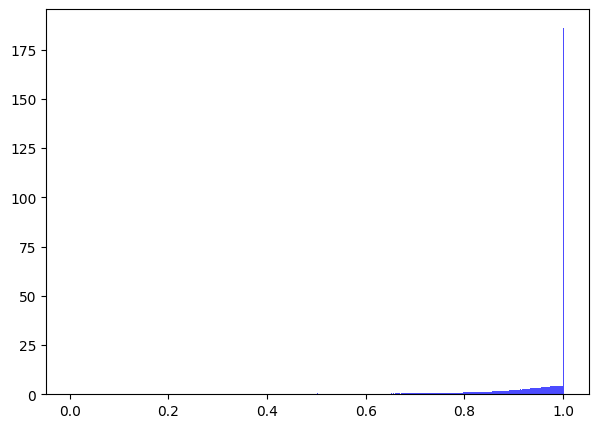

In [50]:
counts, bins = np.histogram(df.norm_score, bins="fd", range=(0.0001, 1.0), density=True)
# counts = counts / np.sum(counts)
plt.figure(figsize=(7, 5))
plt.bar(bins[1:], counts, width=np.diff(bins), align='edge', color='blue', alpha=0.7)

In [51]:
elo_counts.index

Index(['1-1000', '1001-1100', '1101-1200', '1201-1300', '1301-1400',
       '1401-1500', '1501-1600', '1601-1700', '1701-1800', '1801-1900',
       '1900+'],
      dtype='object')

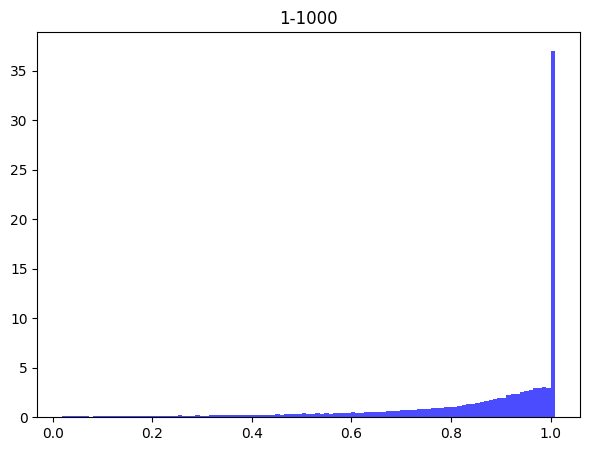

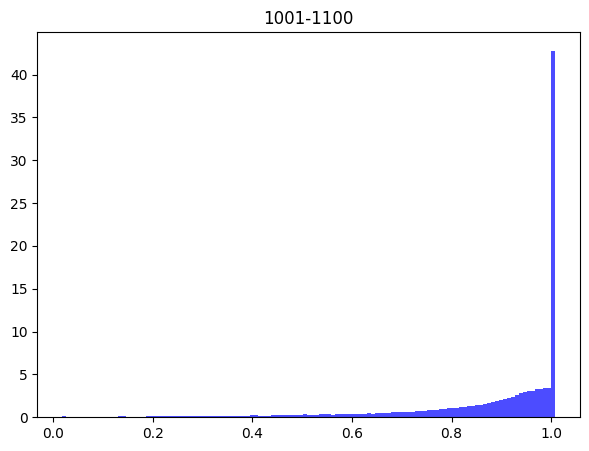

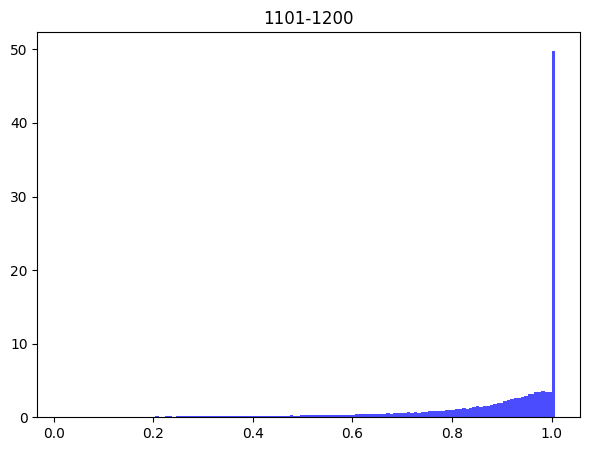

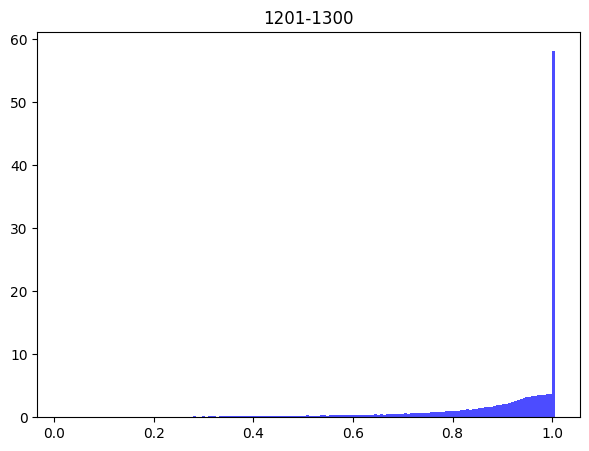

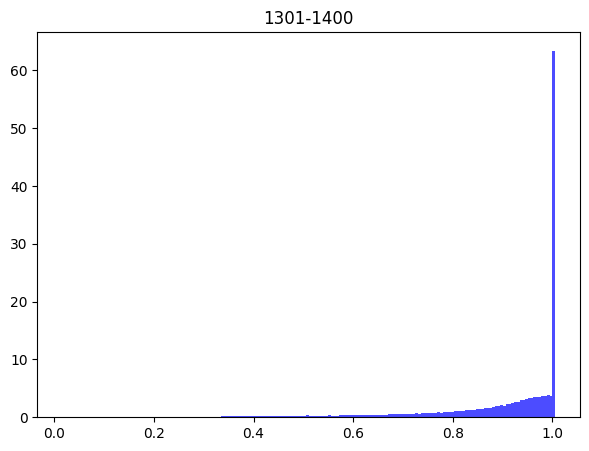

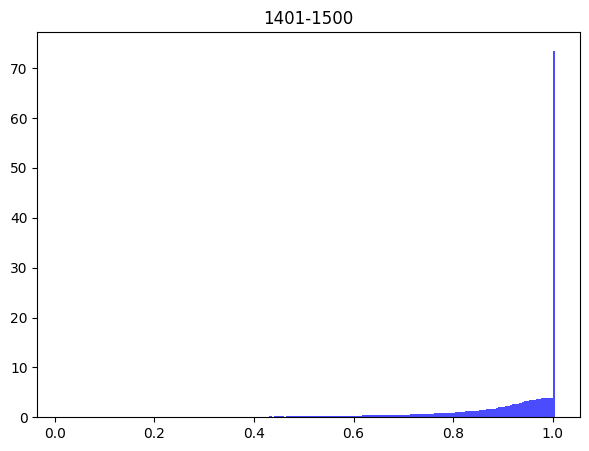

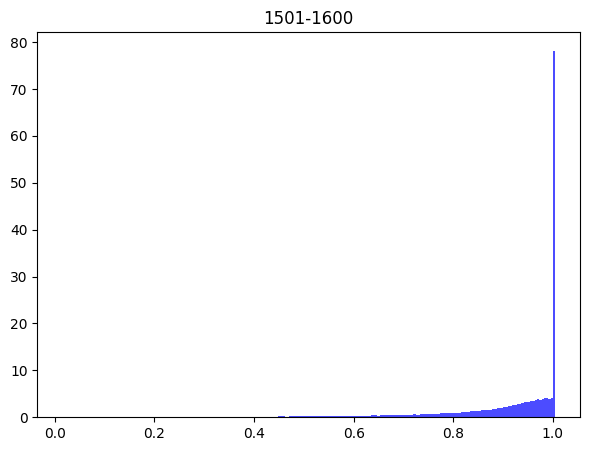

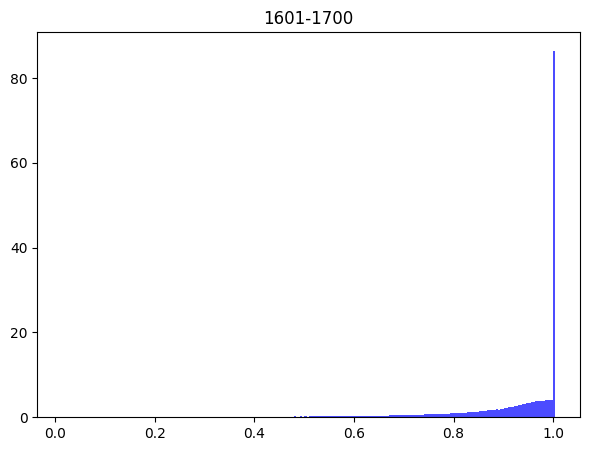

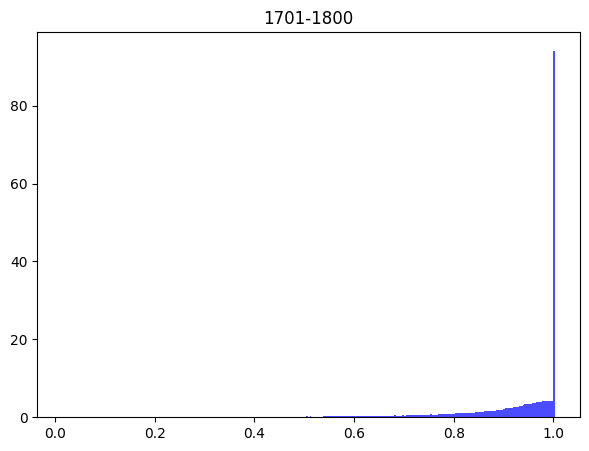

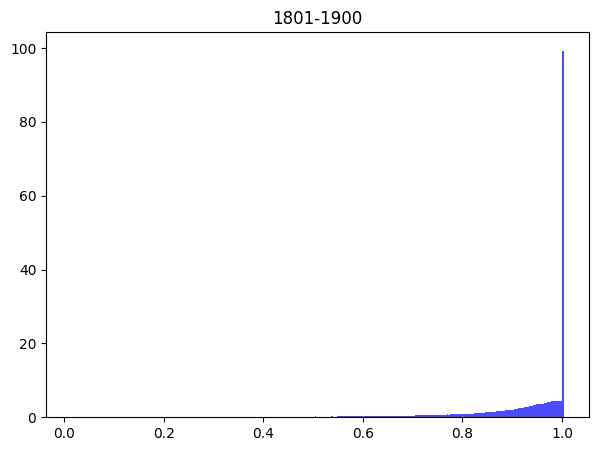

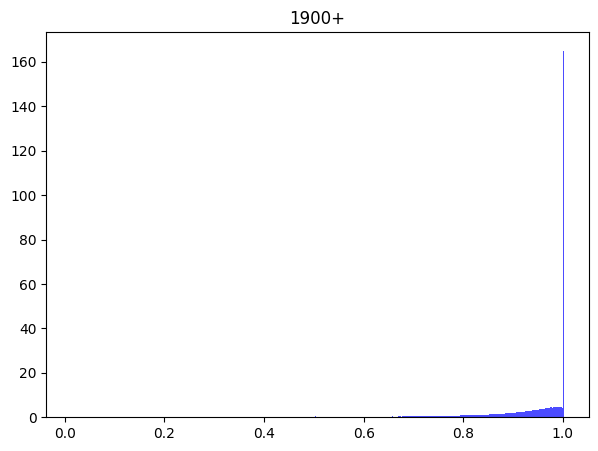

In [52]:
elo_groups = df.groupby('elo_range')
for elo_range, group in elo_groups:
    counts, bins = np.histogram(group['norm_score'], bins="auto", range=(0.01, 1.0), density=True)
    np.save(f"../data/histograms/bins/{elo_range}.npy", bins)
    np.save(f"../data/histograms/counts/{elo_range}.npy", counts)
    
    plt.figure(figsize=(7, 5))
    plt.bar(bins[1:], counts, width=np.diff(bins), align='edge', color='blue', alpha=0.7)
    plt.title(elo_range)
    plt.show()